# Rear Tire Cornering Analysis
## R25B 18.0 x 7.5-10 on 7" Rim
### Comparing Different Influences on Tire Load Outputs

In [1]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import copy

import sys
sys.path.append("/")
import data_helpers

### Import tire data & Show distribution of samples on variable sweeps

In [2]:
run_numbers = [1, 2]
file_name = "tire_data/processed_data/cornering_hoosier_lc10_16x7-5_10x8_run{0}.mat"
   
datas = [sio.loadmat(file_name.format(str(run_num))) for run_num in run_numbers]

df = data_helpers.import_datas(datas)

print(df)

variable_sweeps = {"load" : {"sweep" : np.array([-250, -200, -150, -100, -50]) / 0.224809, "label" : "FZ" },
                    "camber" : {"sweep" : np.array([0, 2, 4]), "label" : "IA"},
                    "pressure" : {"sweep" : np.array([8, 10, 12, 14]) * 6.89476, "label" : "P"},
                    "velocity" : {"sweep" : np.array([15, 25, 45]) * 1.60934, "label" : "V"}}

for variable, info in variable_sweeps.items():
    count = df.groupby([variable])[variable].count()
    variable_sweeps[variable]["count"] = count
    print(count, "\n")

       AMBTMP        ET      FX       FY       FZ     IA    MX     MZ     N  \
0       26.91   278.280 -32.087  -58.786 -556.226  0.001 -1.08   6.57  0.26   
1       26.91   278.290 -37.238  -78.359 -666.497  0.004 -1.03   7.77 -0.01   
2       26.92   278.300 -41.903 -100.600 -776.378 -0.004 -1.42   9.35  0.19   
3       26.93   278.310 -46.449 -125.539 -886.507 -0.020 -1.32  10.00  0.05   
4       26.91   278.320 -51.248 -152.971 -996.891 -0.018 -1.40  10.48  0.12   
...       ...       ...     ...      ...      ...    ...   ...    ...   ...   
52473   28.10  1660.941 -43.111   40.620 -429.211 -0.019 -5.30  -3.72  0.18   
52474   28.10  1660.951 -38.311   31.104 -385.626  0.009 -6.40  -3.06  0.11   
52475   28.09  1660.961 -34.695   22.821 -342.403 -0.022 -5.78  -1.40  0.18   
52476   28.09  1660.971 -31.488   15.748 -300.226  0.003 -5.10  -0.03 -0.16   
52477   28.10  1660.981 -27.053    9.885 -258.730 -0.009 -4.88   1.51 -0.16   

          NFX  ...   SL      SR   TSTC   TSTI   TST

### Comparing lateral force and self aligning moment against slip angle for different pressures. Holds camber, velocity, and load constant by choosing most commonly used value.

In [3]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "pressure":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

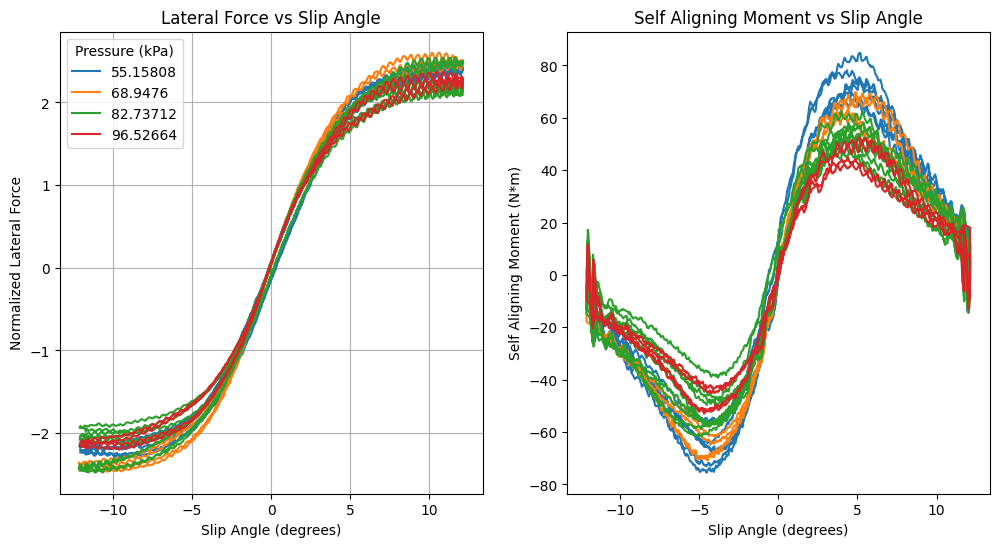

In [4]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["pressure"]["sweep"], title = "Pressure (kPa)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")
plt.grid()
plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, it is clear the 82.74 kPa (12 psi) pressure is optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different cambers. Holds pressure, velocity, and load constant by choosing most commonly used value.

In [5]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "camber":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

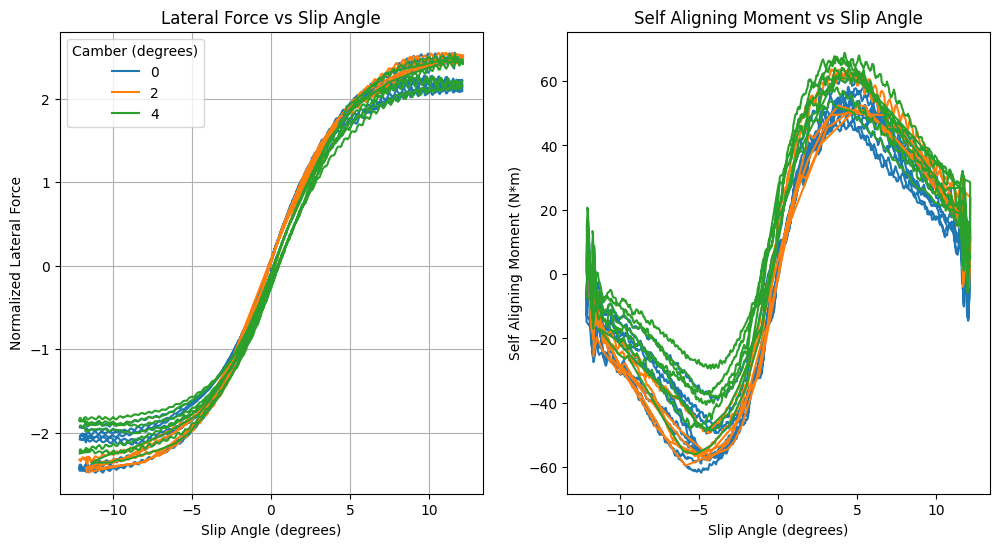

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["camber"]["sweep"], title = "Camber (degrees)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")
plt.grid()
plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, the closer the camber is to zero, the more optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different velocities. Holds pressure, camber, and load constant by choosing most commonly used value.

In [7]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable != "velocity":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

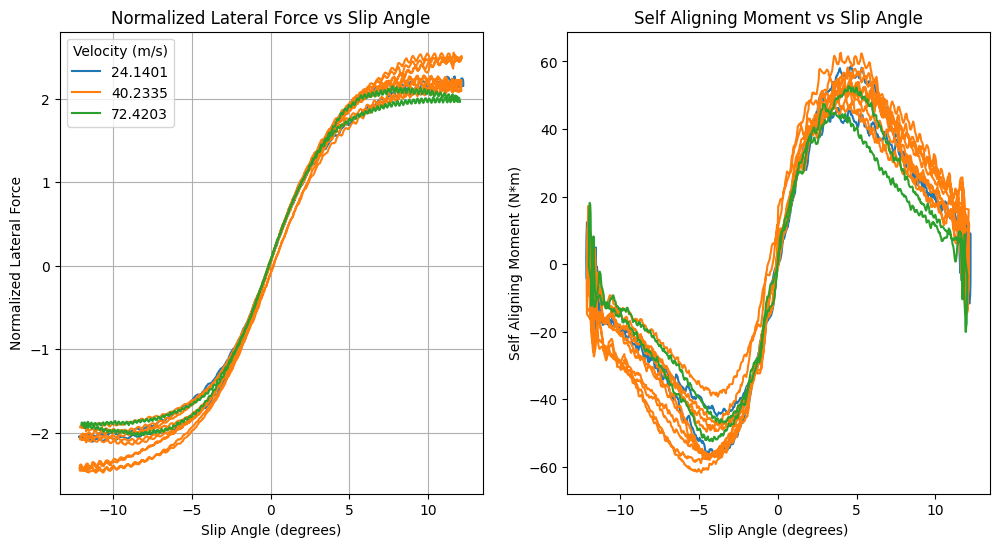

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["velocity"]["sweep"], title = "Velocity (m/s)")
plt.title("Normalized Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")
plt.grid()
plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

In [9]:
pd.set_option('display.max_columns', None)
for i, g in temp_df.groupby(["velocity"]):
    h = g[(g["SA"] > 9.98) & (g["SA"] <= 10)]
    print(h.head(), "\n")   

       AMBTMP        ET      FX        FY        FZ     IA     MX     MZ  \
43980   27.94  1437.227 -11.340 -2378.868 -1101.952 -0.000  34.51  19.74   
44107   27.99  1438.497  -8.627 -2373.422 -1104.734 -0.004  31.64  19.68   

          N     NFX     NFY      P         RE     RL    RST  RUN     SA   SL  \
43980  0.11  0.0132  2.1637  83.62   56433.68  19.16  36.79   16  9.986 -0.0   
44107  0.04  0.0045  2.1696  82.86  145988.56  19.13  37.11   16  9.994 -0.0   

           SR   TSTC   TSTI   TSTO      V         load  camber  pressure  \
43980 -0.9997  57.52  50.32  53.21  24.14 -1112.055122       0  82.73712   
44107 -0.9999  62.47  54.16  55.76  24.18 -1112.055122       0  82.73712   

       velocity  
43980   24.1401  
44107   24.1401   

       AMBTMP        ET      FX        FY        FZ     IA     MX     MZ  \
25358   27.57   860.101 -12.459 -2319.818 -1107.838  0.015  32.18  18.01   
31481   27.64  1027.846 -18.521 -2419.593 -1096.226  1.998  20.63  23.80   
31605   27.64  10